# Materi KNN

# Konsep Outlier Detection dalam KNN (K-Nearest Neighbors)
Outlier detection adalah proses mengidentifikasi data yang menyimpang secara signifikan dari pola mayoritas dalam dataset. Dalam konteks K-Nearest Neighbors (KNN), metode ini digunakan untuk mendeteksi titik data yang tidak memiliki tetangga dekat yang cukup banyak atau memiliki jarak yang jauh dari kelompok utama.

Bagaimana KNN Digunakan untuk Mendeteksi Outlier?
KNN mendeteksi outlier berdasarkan konsep kedekatan antar titik data. Beberapa metode umum dalam KNN untuk deteksi outlier adalah:

1. KNN Distance-Based Outlier Detection
Metode ini mengukur jarak rata-rata antara sebuah titik dengan K tetangga terdekatnya. Jika jarak rata-rata tersebut sangat besar dibandingkan dengan data lainnya, maka titik tersebut dapat dianggap sebagai outlier.

Langkah-langkah:

Pilih nilai K (jumlah tetangga terdekat).
Hitung jarak antara setiap titik data dengan K tetangga terdekatnya (menggunakan Euclidean Distance, Manhattan Distance, dll.).
Tentukan apakah suatu titik merupakan outlier dengan cara:
Jika jarak ke K tetangga terdekat jauh lebih besar dibandingkan data lainnya, maka titik tersebut adalah outlier.
Contoh:

Jika titik data A memiliki K tetangga terdekat dengan rata-rata jarak 2.5, sedangkan titik B memiliki rata-rata jarak 10.0, maka titik B lebih mungkin dianggap sebagai outlier.
2. KNN Density-Based Outlier Detection (LOF - Local Outlier Factor)
Metode ini membandingkan kepadatan lokal suatu titik dengan kepadatan lokal tetangganya. Jika kepadatan suatu titik jauh lebih rendah dibandingkan dengan titik di sekitarnya, maka itu bisa dianggap sebagai outlier.

Cara kerja:
Hitung kepadatan lokal setiap titik berdasarkan jumlah tetangga dalam radius tertentu.
Bandingkan kepadatan lokal titik tersebut dengan kepadatan lokal tetangganya.
Jika suatu titik memiliki kepadatan yang jauh lebih rendah dibandingkan tetangganya, maka itu adalah outlier.

In [1]:
%pip install pymysql
%pip install psycopg2

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


 id           class  petal length  petal width  sepal length  sepal width   distance  outlier
  1     Iris-setosa          86.4         70.0          20.1         30.5 110.538771     True
  2     Iris-setosa           1.4          0.2           4.9          3.0   4.153312    False
  3     Iris-setosa           1.3          0.2           4.7          3.2   4.298837     True
  4     Iris-setosa           1.5          0.2           4.6          3.1   4.149699    False
  5     Iris-setosa           1.4          0.2           5.0          3.6   4.173727    False
  6     Iris-setosa           1.7          0.4           5.4          3.9   3.818377    False
  7     Iris-setosa           1.4          0.3           4.6          3.4   4.217819    False
  8     Iris-setosa           1.5          0.2           5.0          3.4   4.060788    False
  9     Iris-setosa           1.4          0.2           4.4          2.9   4.302325     True
 10     Iris-setosa           1.5          0.1           4.9

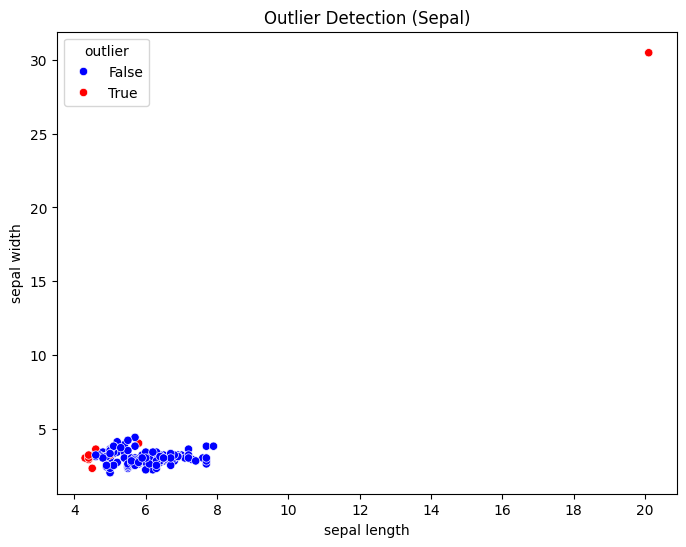

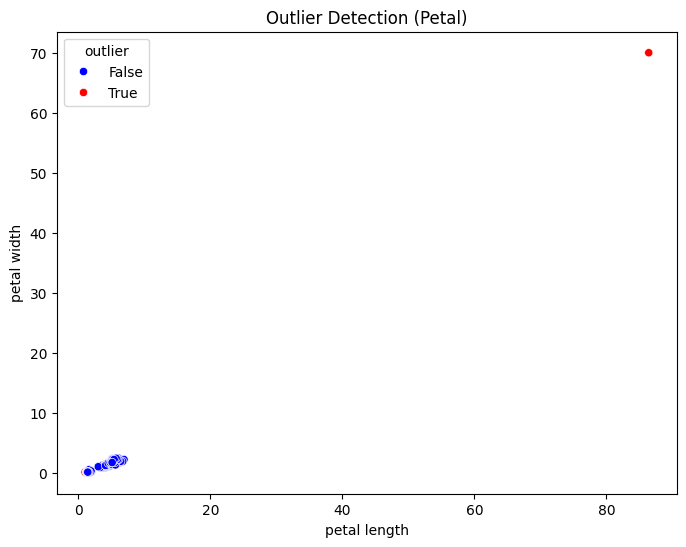

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-23566fa8-poostgree.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_PQHHNe5BmPwoXLKHHad",
        database="defaultdb",
        port=19790
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM rossi.postgree")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-761e1af-mysqlmysql.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_b3-R_nwIM0G13-jogyl",
        database="defaultdb",
        port=22667
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()
df_postgresql = df_postgresql.rename(columns={'Class': 'class'})

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal length", "petal width", "sepal length", "sepal width"]
data_values = df_merged[feature_columns].values

# Ambil referensi dari baris terakhir (baris ke-152 jika dihitung dari 1, atau index -1)
reference_point = data_values[-1]

def compute_distances(data, reference):
    return np.array([euclidean(row, reference) for row in data])

# Hitung jarak Euclidean dari setiap baris ke referensi
df_merged["distance"] = compute_distances(data_values, reference_point)

# Tentukan threshold outlier berdasarkan persentil ke-95 (bisa disesuaikan)
threshold = np.percentile(df_merged["distance"], 93.5)
df_merged["outlier"] = df_merged["distance"] > threshold

# Cetak hasil data dengan outlier
print(df_merged.to_string(index=False))

# Visualisasi scatter plot dengan warna berdasarkan outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal length"], y=df_merged["sepal width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Sepal)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal length"], y=df_merged["petal width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Petal)")
plt.show()


In [3]:
# Hitung total outlier
total_outliers = df_merged["outlier"].sum()
print(f"Total Outlier: {total_outliers}")


Total Outlier: 10


In [4]:
# Urutkan data berdasarkan jarak dari terkecil ke terbesar
df_sorted = df_merged.sort_values(by="distance", ascending=True)

# Tampilkan hasilnya
print(df_sorted.to_string(index=False))

 id           class  petal length  petal width  sepal length  sepal width   distance  outlier
150  Iris-virginica           5.1          1.8           5.9          3.0   0.000000    False
128  Iris-virginica           4.9          1.8           6.1          3.0   0.282843    False
139  Iris-virginica           4.8          1.8           6.0          3.0   0.316228    False
102  Iris-virginica           5.1          1.9           5.8          2.7   0.331662    False
143  Iris-virginica           5.1          1.9           5.8          2.7   0.331662    False
 71 Iris-versicolor           4.8          1.8           5.9          3.2   0.360555    False
 84 Iris-versicolor           5.1          1.6           6.0          2.7   0.374166    False
122  Iris-virginica           4.9          2.0           5.6          2.8   0.458258    False
127  Iris-virginica           4.8          1.8           6.2          2.8   0.469042    False
124  Iris-virginica           4.9          1.8           6.3

In [5]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.neighbors import LocalOutlierFactor
from matplotlib.legend_handler import HandlerPathCollection

# Fungsi untuk mengambil data dari PostgreSQL
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-23566fa8-poostgree.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_PQHHNe5BmPwoXLKHHad",
        database="defaultdb",
        port=19790
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM rossi.postgree")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Fungsi untuk mengambil data dari MySQL
def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-761e1af-mysqlmysql.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_b3-R_nwIM0G13-jogyl",
        database="defaultdb",
        port=22667
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()
df_postgresql = df_postgresql.rename(columns={'Class': 'class'})

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil fitur numerik untuk analisis outlier
feature_columns = ["petal length", "petal width", "sepal length", "sepal width"]
X = df_merged[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
X_scores = clf.negative_outlier_factor_

# Tambahkan hasil deteksi outlier ke dataframe
df_merged["lof_outlier"] = y_pred == -1  # True jika outlier, False jika bukan

# # Cetak hasil data dengan deteksi outlier
# print(df_merged[["id", "class", "lof_outlier"]])

# Fungsi untuk menyesuaikan ukuran legend marker
def update_legend_marker_size(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([20])

# # Plot hasil deteksi outlier
# plt.figure(figsize=(8, 6))
# plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
# scatter = plt.scatter(
#     X[:, 0], X[:, 1], s=1000 * radius, edgecolors="r", facecolors="none", label="Outlier scores"
# )
print(y_pred)
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.legend(handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)})
# plt.title("Local Outlier Factor (LOF)")
# plt.show()


[-1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
